/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)



Preselection

(3000, 2048)
-
2234
0.7446666666666667
-
Object selection: knn

Dfmf

Parameters

18 18 2 2


auc: 0.6872646867382232

rmse: 1.0415068968161982


-----



auc: 0.6872646867382232

Preselection

(3000, 2048)
-
2234
0.7446666666666667
-
Object selection: knn

Dfmf

Parameters

12 10 8 8


auc: 0.6300369737496255

rmse: 1.2353119803091237


-----



auc: 0.6300369737496255

Preselection

(3000, 2048)
-
2234
0.7446666666666667
-
Object selection: knn

Dfmf

Parameters

12 10 8 8


auc: 0.6724190776795583

rmse: 1.176331448790743


-----



auc: 0.6724190776795583

Preselection

(3000, 2048)
-
2234
0.7446666666666667
-
Object selection: knn

Dfmf

Parameters

12 10 8 8


auc: 0.6362085490700274

rmse: 1.217831124018305


-----



auc: 0.6362085490700274

Preselection

(3000, 2048)
-
2234
0.7446666666666667
-
Object selection: knn

Dfmf

Parameters

12 10 8 8


auc: 0.6515556324401901

rmse: 1.2159332333920765


-----



auc: 0.6515556324401901

Preselection

(3000, 2048)
-
22

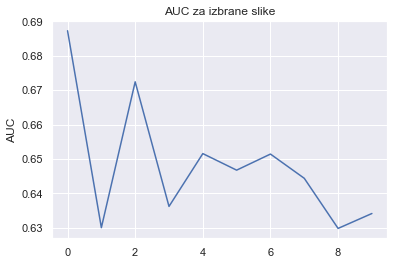

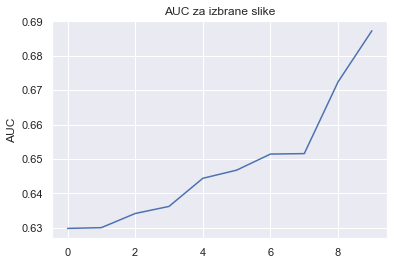

In [1]:
import os
import sys
parent_dir = os.path.split(os.getcwd())[0]
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import random
import pickle

from utils import get_features, save_scores
from object_selection import ObjectSelection
from load_data import load_data
import matplotlib.pyplot as plt

# Parameters
data_directory = '../../data/generated-data-nr-2-n-8-2/'
features_path = '../../data/features-generated-data-nr-2-n-8-2'
booking_file = '../../data/booking.csv'
users_file = '../../data/user.csv'
rating_thresholds = []
true_objects_indexes = [0, 1, 2, 3, 4, 5, 6, 7]
false_objects_indexes = [8, 9]

file_names = os.listdir(data_directory)
img_ids_vector = [int(name.split('-')[0]) for name in file_names]
ratings_vector = [int(name.split('-')[-2]) for name in file_names]
name_vector = [data_directory + name for name in file_names]
images_indexes = [name.split('-')[3].split('.')[0] for name in file_names]

ratings_matrix, images_indexes_for_id, ids_indexes, users_matrix = load_data(data_directory, booking_file,
                                                                             users_file, rating_thresholds, binary=True)

features = get_features(features_path, name_vector)

# K Nearest Neighbors
cv_results_file = '../results/cv-generated-data-nr-2-n-8-2-knn.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='knn')
    #selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix, users=users_matrix, cv_results_file=cv_results_file)
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector)
    selection.evaluate(evaluation_metric='auc')
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-nr-2-n-8-2-knn.csv'
save_scores(scores, results_file)

Object selection: random

Dfmf

Parameters

16 18 2 2


rmse: 1.0470274603039713


-----



auc: 0.6806659817759513
Object selection: random

Dfmf

Parameters

14 10 8 8


rmse: 1.3104058825630396


-----



auc: 0.6067063554318837
Object selection: random

Dfmf

Parameters

14 10 8 8


rmse: 1.3030422296480482


-----



auc: 0.6031973369057768
Object selection: random

Dfmf

Parameters

14 10 8 8


rmse: 1.2982732650135829


-----



auc: 0.6604850674063085
Object selection: random

Dfmf

Parameters

14 10 8 8


rmse: 1.2832121317311562


-----



auc: 0.6025732434534612
Object selection: random

Dfmf

Parameters

14 10 8 8


rmse: 1.2663242391851437


-----



auc: 0.6588581771228874
Object selection: random

Dfmf

Parameters

14 10 8 8


rmse: 1.2596600207378454


-----



auc: 0.6479219584262091
Object selection: random

Dfmf

Parameters

14 10 8 8


rmse: 1.2792261576555273


-----



auc: 0.5768010212788302
Object selection: random

Dfmf

Parameters

14 10 8 8


rmse: 1.26417537

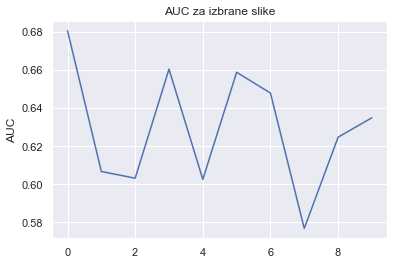

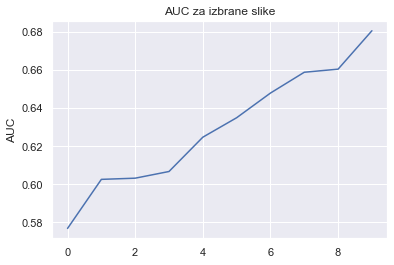

In [2]:
# Random selection
cv_results_file = '../results/cv-generated-data-nr-2-n-8-2-random.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='random')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector) 
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-nr-2-n-8-2-random.csv'
save_scores(scores, results_file)


Preselection

(3000, 2048)
-
2210
0.7366666666666667
-
Object selection: rf

Dfmf

Parameters

16 18 2 2


rmse: 1.0687386995755503


-----



auc: 0.6623722797000349

Preselection

(3000, 2048)
-
2214
0.738
-
Object selection: rf

Dfmf

Parameters

12 10 8 8


rmse: 1.4012864989635851


-----



auc: 0.5918466000644538

Preselection

(3000, 2048)
-
2197
0.7323333333333334
-
Object selection: rf

Dfmf

Parameters

12 10 8 8


rmse: 1.4270683930689039


-----



auc: 0.6159510781255413

Preselection

(3000, 2048)
-
2206
0.7353333333333333
-
Object selection: rf

Dfmf

Parameters

12 10 8 8


rmse: 1.4146419915852213


-----



auc: 0.587183608526943

Preselection

(3000, 2048)
-
2206
0.7353333333333333
-
Object selection: rf

Dfmf

Parameters

12 10 8 8


rmse: 1.4138641965590266


-----



auc: 0.5993849953022817

Preselection

(3000, 2048)
-
2192
0.7306666666666667
-
Object selection: rf

Dfmf

Parameters

12 10 8 8


rmse: 1.4032853091918884


-----



auc: 0.5990451282803347

Prese

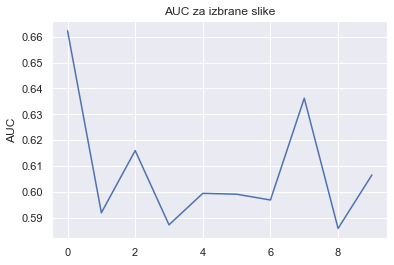

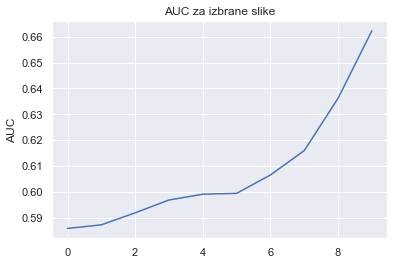

In [3]:


# Random forest
cv_results_file = '../results/cv-generated-data-r-2-n-8-2-random.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='rf')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector) 
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-nr-2-n-8-2-rf.csv'
save_scores(scores, results_file)

In [4]:
from basic_factorization import BasicFactorization


cv_results_file = '../results/cv-generated-data-nr-2-n-8-2-knn.csv'
scores = []
for _ in range(10):
    selection = BasicFactorization(show_selection_results=True, selection_algorithm='random')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                        users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                        true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                        paths=name_vector)
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
results_file = '../scores/generated-data-nr-2-n-8-2-b.csv'
save_scores(scores, results_file)

Object selection: random

Dfmf

auc: 0.6704363877921751
Object selection: random

Dfmf

auc: 0.6689847170590666
Object selection: random

Dfmf

auc: 0.6560311541967023
Object selection: random

Dfmf

auc: 0.6837092176116566
Object selection: random

Dfmf

auc: 0.6530946134173253
Object selection: random

Dfmf

auc: 0.6644392438048765
Object selection: random

Dfmf

auc: 0.6757123977730601
Object selection: random

Dfmf

auc: 0.661404407828596
Object selection: random

Dfmf

auc: 0.673245735246087
Object selection: random

Dfmf

auc: 0.6819027604113399
